<a href="https://colab.research.google.com/github/manith506/projects/blob/main/Heart%20attack%20prediction%20using%20Machine%20Learning/Copy_of_Heart_Attak_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Required Modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### **Importing DataSet**

In [ ]:
df = pd.read_csv('/content/heart_attack_pred.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,M,ATA,130,132,0,ST,185,0,0.0,?,?,?,0
1,29,M,ATA,120,243,0,LVH,160,0,0.0,?,?,?,0
2,29,M,ATA,140,?,0,LVH,170,0,0.0,?,?,?,0
3,30,F,ASY,170,237,0,Normal,170,0,0.0,?,?,6,0
4,31,F,ATA,100,219,0,Normal,150,0,0.0,?,?,?,0


In [ ]:
''' even though dataset containes null values but, they are represented as a question marks
    to remove the null values we have to convert first question marks into NaN values  '''

df = pd.read_csv('/content/heart_attack_pred.csv', na_values='?')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,M,ATA,130.0,132.0,0.0,ST,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,M,ATA,120.0,243.0,0.0,LVH,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,M,ATA,140.0,NaN,0.0,LVH,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,F,ASY,170.0,237.0,0.0,Normal,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,F,ATA,100.0,219.0,0.0,Normal,150.0,0.0,0.0,NaN,NaN,NaN,0


## **Exploratary Data Analysis**

In [ ]:
df.shape

(294, 14)

In [ ]:
'''num column has an unwanted spaces between names , want to remove that and i'll rename that column as a target column'''
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [ ]:
df = df.rename(columns={"num       " : 'target'})
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### **Handling Null Values**

In [ ]:
'''total records is  294, but some colums seems to have null values, lets check which columns have null values'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    object 
 2   cp        294 non-null    object 
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    object 
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 32.3+ KB


In [ ]:
'''yes, 9 columns have null values. out of 9 slope, ca,thal have more than 50% of null values
so these columns will not contribute much to the model so, it's better to drop these columns'''
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64

In [ ]:
'''  extracting the columns having null values'''
[features for features in df.columns if df[features].isnull().sum()>0]

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'slope',
 'ca',
 'thal']

<Axes: >

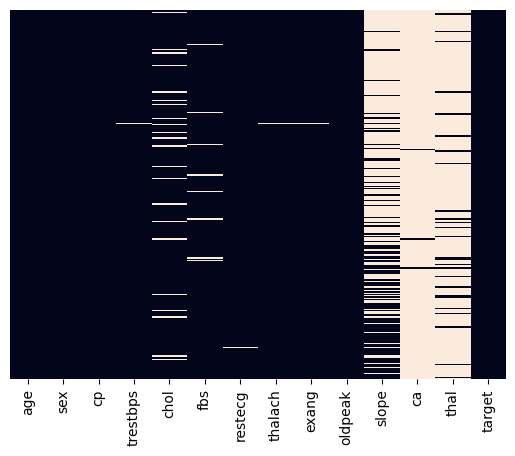

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False , cmap=None)

In [ ]:
df.drop(['slope','ca','thal'], axis=1, inplace=True)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'target'],
      dtype='object')

### **Replacing Null Values with Mean using Simple Imputer**

In [ ]:
'''converting the cholestrol series into dataframe and further converting into numpy 2D array
   because imputer will not take series objects to convert the missing values  '''
cholestrol = df["chol"]
cholestrol = cholestrol.to_frame()
cholestrol = cholestrol.values.reshape(-1,1)

In [ ]:
'''by using sklearn imputer we have filled the null values in the chol column with the mean of that column'''
imputer = SimpleImputer(missing_values=np.NaN , strategy='mean')
imputer.fit(cholestrol)
df["chol"] = imputer.transform(cholestrol)



In [ ]:
'''now chol column doesn"t have missing values
  another columns containes max of 8 to 12  missing values so dropping those records
   will not impact on the model'''
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         8
restecg     1
thalach     1
exang       1
oldpeak     0
target      0
dtype: int64

In [ ]:
'''Now the is cleaned it has 0 missing values now '''
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

### **Statistical Analysis**

In [ ]:
df.describe()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,target
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,47.820423,132.725352,248.987748,0.070423,139.193662,0.306338,0.589085,0.362676
std,7.860947,17.761731,62.945390,0.256309,23.841226,0.461786,0.915775,0.481621
min,28.000000,92.000000,85.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,120.000000,211.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,130.000000,248.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,140.000000,275.250000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,200.000000,603.000000,1.000000,190.000000,1.000000,5.000000,1.000000


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,M,ATA,130.0,132.000000,0.0,ST,185.0,0.0,0.0,0
1,29,M,ATA,120.0,243.000000,0.0,LVH,160.0,0.0,0.0,0
2,29,M,ATA,140.0,250.848708,0.0,LVH,170.0,0.0,0.0,0
3,30,F,ASY,170.0,237.000000,0.0,Normal,170.0,0.0,0.0,0
4,31,F,ATA,100.0,219.000000,0.0,Normal,150.0,0.0,0.0,0


### **One Hot Encoding and Label Encoding**

In [ ]:
''' label encoder  is used to change the ctegorical values into numeric
    here im changing the sex column{M : 1 , F : 0} into numeric
    but the values{0, 1} are have an order'''
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])

In [ ]:
''' column tranformer and one hot encoding is used to change the categorical columns into numeric
    but here the output will be in binary reprentation and the the values doesn't have any order
    eg : ATA = {0.0, 0.1, 0.0}
         ASY = {1.0, 0.0, 0.0 }'''
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(),[2]),("encoder_1", OneHotEncoder(),[6])], remainder="passthrough")
df_z = (ct.fit_transform(df))

In [ ]:
df_x = df_z[: , 0:-1]

In [ ]:
df_x

array([[  0.,   1.,   0., ..., 185.,   0.,   0.],
       [  0.,   1.,   0., ..., 160.,   0.,   0.],
       [  0.,   1.,   0., ..., 170.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 150.,   1.,   3.],
       [  0.,   1.,   0., ..., 110.,   1.,   1.],
       [  0.,   0.,   0., ..., 115.,   1.,   1.]])

In [ ]:
df_y= df_z[:, -1]
df_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### **Splitting the Dataset into Train Data and Test Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size = 0.25, random_state = 1)

### **Scaling the Data using Standard Scaler**

In [ ]:
sc = StandardScaler()
X_train[: , [7,9,10,12]] = sc.fit_transform(X_train[: , [7,9,10,12]])
X_test[: , [7,9,10,12]] = sc.fit_transform(X_test[: , [7,9,10,12]])

## **Classification Analysis**

### **Classification Using Logistic Regression**

In [ ]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
test_pred = clf.predict(X_test)

In [ ]:
mean_squared_error(Y_test, test_pred)

0.16901408450704225

In [ ]:
accuracy_score(Y_test, test_pred)

0.8309859154929577

In [ ]:
confusion_matrix(Y_test, test_pred)

array([[45,  3],
       [ 9, 14]])

### **Classification Using Decision Tree**

In [ ]:
dc_clf = DecisionTreeClassifier()
dc_clf.fit(X_train, Y_train)

dc_Pred = dc_clf.predict(X_test)
print("mse : ", mean_squared_error(Y_test, dc_Pred))
print("accracy :",accuracy_score(Y_test, dc_Pred))

mse :  0.28169014084507044
accracy : 0.7183098591549296


### **Classification Using Random Forest**

In [ ]:
rc_clf = RandomForestClassifier()
rc_clf.fit(X_train, Y_train)

rc_Pred = rc_clf.predict(X_test)
print("mse : ", mean_squared_error(Y_test, rc_Pred))
print("accracy :",accuracy_score(Y_test, rc_Pred))

mse :  0.15492957746478872
accracy : 0.8450704225352113


### **Classification Using Support Vector Machine**

In [ ]:
sc_clf = SVC()
sc_clf.fit(X_train, Y_train)

sc_Pred = sc_clf.predict(X_test)
print("mse : ", mean_squared_error(Y_test, sc_Pred))
print("accracy :",accuracy_score(Y_test, sc_Pred))

mse :  0.15492957746478872
accracy : 0.8450704225352113


## **Result**

    The Analysis done using 4 diffrent machine learning Alogithms. although most of the algorithm gave the same result but, the one with the highest
    accuracy and least mean square error is using Random Forest Classification.

    Mean Square Error :  0.15492957746478872
    Accracy : 0.8450704225352113(84 %)

